# Customer Churn prediction

# Part 1 - DEFINE

### ---- Define the problem ----

The problem is to develop a ML model which will predict the probability of churn of customers. The model will learn from existing data of churned and norn churned customers which has some features and the target variable which is the 'Churn' column. 

In [67]:
#Import all the necessary libraries
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [68]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [69]:
raw_df=pd.read_csv('TelecomCustomer_data.csv')

In [70]:
raw_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [71]:
raw_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [72]:
raw_df.duplicated().sum()

0

In [73]:
raw_df.loc[(raw_df.Churn=='Yes'),'Churn']=1
raw_df.loc[(raw_df.Churn=='No'),'Churn']=0

raw_df.Churn=raw_df.Churn.astype('category')

In [74]:
raw_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [75]:
raw_df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn               category
dtype: object

In [76]:
raw_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
raw_df['TotalCharges']=pd.to_numeric(raw_df['TotalCharges'],errors='coerce').fillna(0).astype(int)

In [78]:
raw_df.describe(include=[np.number])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.265086
std,0.368612,24.559481,30.090047,2266.790864
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.000000
50%,0.000000,29.000000,70.350000,1394.000000
75%,0.000000,55.000000,89.850000,3786.500000
max,1.000000,72.000000,118.750000,8684.000000


In [79]:
raw_df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,6968-URWQU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


# 2. Explore

## EDA

In [80]:
def plot_figure(df,col):
    fig=plt.figure(figsize=(10,5))
    ax1=plt.subplot(1,2,1)
    
    if df[col].dtype=='O':
        df[col].value_counts().sort_index().plot(kind='bar',ax=ax1)
        plt.xticks(rotation=45)
    else:
        df[col].value_counts().sort_index().plot()
        #sns.boxplot(df[col])
        
    ax2=plt.subplot(1,2,2)
    
    if df[col].dtype=='O':
        pd.crosstab(raw_df[col],df['Churn']).plot(kind="bar",stacked=True,ax=ax2)
        plt.xticks(rotation=360)
    else:
        #plt.plot(train_df.groupby('Churn')[col].mean())
        #ax2.invert_yaxis()
        sns.boxplot(x=col,y='Churn',data=raw_df)
        
    plt.show()

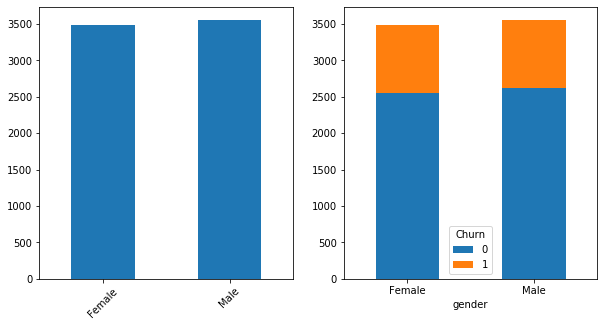

In [81]:
plot_figure(raw_df,'gender')

###### The churn rate of males and females seems to be almost same with males slightly more than females

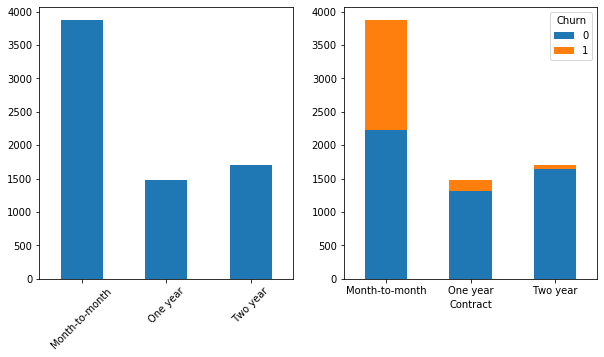

In [82]:
plot_figure(raw_df,'Contract')

##### month-to-month contract has a significant correlation with churn as majoriry of churned customers fall in this category

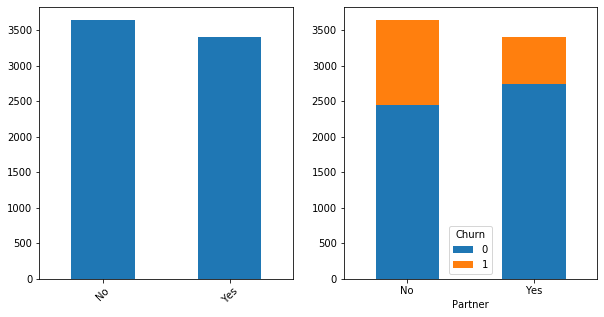

In [83]:
plot_figure(raw_df,'Partner')

##### Customers with no partners seems to be churning more

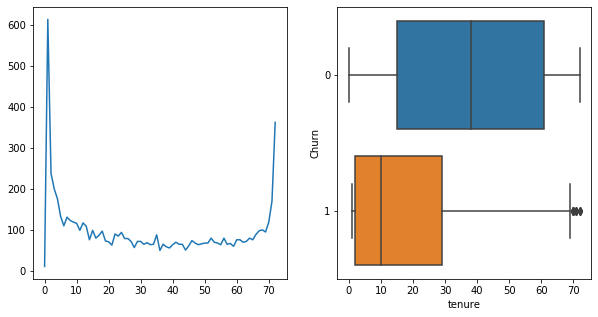

In [84]:
plot_figure(raw_df,'tenure')

##### The average tenure of churning customers is 10 months.The average tenure of non-churning customers is 38 months.So the longer the tenure the less likely they will churn

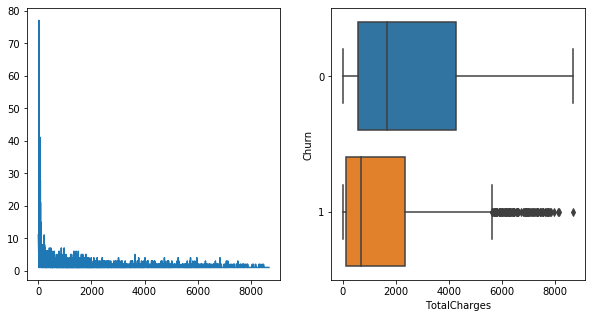

In [85]:
plot_figure(raw_df,'TotalCharges')

##### Interestingly, it seems like a negative correlation where less total charges have led to more churn!

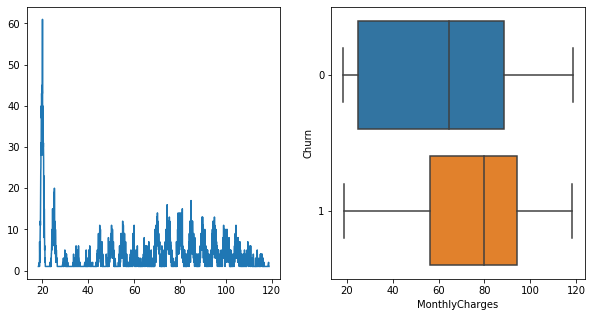

In [86]:
plot_figure(raw_df,'MonthlyCharges')

##### Churned customers had average total charges higher than non-churned customers

#### Heatmap

In [87]:
num_cols=['tenure','MonthlyCharges', 'TotalCharges']

In [88]:
num_df=raw_df[num_cols + ['Churn']].astype(np.int64)

In [89]:
num_df.head(4)

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29,29,0
1,34,56,1889,0
2,2,53,108,1
3,45,42,1840,0


In [90]:
corr=num_df.corr()

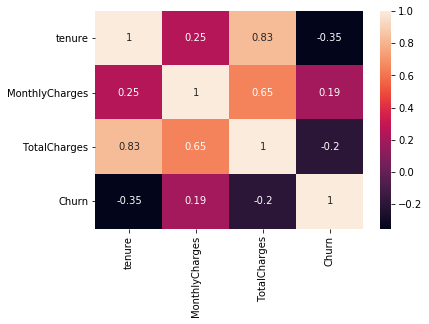

In [91]:
sns.heatmap(corr,annot=True)

### Model Selection 

In [92]:
raw_df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges           int32
Churn               category
dtype: object

In [93]:
raw_df['MonthlyCharges']=pd.to_numeric(raw_df['MonthlyCharges'])
raw_df['TotalCharges'] = np.where(raw_df['TotalCharges'] ==" " , raw_df['MonthlyCharges'], raw_df['TotalCharges'])
raw_df['TotalCharges']=pd.to_numeric(raw_df['TotalCharges'])

C:\Users\nnampoothiry\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [94]:
#t=raw_df[(raw_df.TotalCharges)==" "]

In [95]:
target=['Churn']

In [96]:
num_cols=['tenure','MonthlyCharges', 'TotalCharges']

##### Scaling the numerical columns 

In [97]:
std=StandardScaler()

scaled_df=std.fit_transform(raw_df[num_cols])
scaled_df = pd.DataFrame(scaled_df,columns=num_cols)

In [98]:
scaled_df.shape

(7043, 3)

In [99]:
raw_df2=raw_df.drop(columns=num_cols,axis=1)
raw_df2=raw_df2.merge(scaled_df,left_index=True,right_index=True,how = "left")

In [100]:
raw_df2.shape

(7043, 21)

In [101]:
raw_df2.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,0,-1.277445,-1.160323,-0.992780
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,0,0.066327,-0.259629,-0.172179
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,1,-1.236724,-0.362660,-0.957927
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),0,0.514251,-0.746535,-0.193797
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,1,-1.236724,0.197365,-0.938956


##### Encode categorical variables

In [102]:
cat_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
          'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

#num_cols=['tenure','MonthlyCharges', 'TotalCharges']

In [103]:
#Raw
cat_cols_raw=pd.get_dummies(raw_df2[cat_cols])
num_cols_raw=raw_df2[num_cols+['Churn']]#.apply(pd.to_numeric)
num_cols_raw[num_cols]=(num_cols_raw[num_cols]).apply(pd.to_numeric)

master_raw=pd.concat([cat_cols_raw,num_cols_raw],axis=1)
master_raw=shuffle(master_raw).reset_index(drop=True)

C:\Users\nnampoothiry\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [104]:
master_raw.head(5)

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,1,0,-0.748080,0.709199,-0.460713,1
1,0,1,0,1,0,0,1,0,1,1,...,0,1,0,0,0,1,0.636413,1.021617,1.035782,1
2,1,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0.107048,0.273808,0.084590,0
3,0,0,1,0,1,1,0,0,1,0,...,0,1,0,1,0,0,-0.055834,0.857099,0.286652,0
4,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,1,0,-0.707359,1.285842,-0.326593,0


In [105]:
master_raw.columns

Index(['SeniorCitizen', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
     

In [106]:
master_raw.shape

(7043, 46)

In [107]:
X_train, X_test, y_train, y_test=train_test_split(master_raw.loc[:, master_raw.columns != 'Churn'],\
                                                  master_raw[['Churn']],test_size=0.3)

In [108]:
print('Shape of training set =', X_train.shape)

print('Shape of training set target =', y_train.shape)

print('Shape of test set =', X_test.shape)

print('Shape of test set target =', y_test.shape)

Shape of training set = (4930, 45)
Shape of training set target = (4930, 1)
Shape of test set = (2113, 45)
Shape of test set target = (2113, 1)


## Part 3 - DEVELOP

We will cycle through training/validing models until we've reached the efficacy goal

#### Your metric will be Accuracy and your goal is:

Roc Auc Score above 70% or above

Accuracy score of 80% or above
 

### ---- Hypothesize solution ----

Brainstorm 3 models that may improve results over the baseline model based on the  efficacy goal.

Based on the efficacy goal they are:

1. Logistic Regression
2. Random Forest Classification
3. Gradient Boosting Classification

### ---- Cross validation----

##### Logistic regression

In [109]:
logistic=LogisticRegression(max_iter=4000)

In [110]:
logistic_score=cross_val_score(logistic,X_train,y_train.values.ravel(),scoring="roc_auc",cv=10)

In [111]:
logistic_score

array([0.84082971, 0.85913408, 0.79442457, 0.85360763, 0.86502257,
       0.84732516, 0.8479747 , 0.84180935, 0.82975552, 0.85740906])

In [112]:
mean_roc_auc_logistic=round(np.mean(logistic_score),3)*100
mean_roc_auc_logistic

84.39999999999999

##### Random forest classifier

In [113]:
rf=RandomForestClassifier()

In [114]:
rf_score=cross_val_score(rf,X_train,y_train.values.ravel(),scoring="roc_auc",cv=10)

In [115]:
mean_rf_roc_auc=round(np.mean(rf_score),2)*100
mean_rf_roc_auc

81.0

##### Gradient boosting classifier

In [116]:
gbc=GradientBoostingClassifier()

In [117]:
gbc_score=cross_val_score(gbc,X_train,y_train.values.ravel(),scoring="roc_auc",cv=10)

In [118]:
mean_gbc_roc_auc=(np.mean(gbc_score))*100
mean_gbc_roc_auc

84.54414771275236

### ---- Select best model  ----

Gradient Boosting Classifier came up with the best ROC AUC score and we now fit the entire training set and train the model

## Part 4 - DEPLOY

In [128]:
%%time

gbm=GradientBoostingClassifier(n_estimators=70)

gbm.fit(X_train,y_train.values.ravel())

predict_train=gbm.predict(X_train)
ROC_AUC_train=roc_auc_score(y_train.values.ravel(),predict_train)
accuracy_train=accuracy_score(y_train.values.ravel(),predict_train)


#test_set_without_churn=test_set.drop(columns='Churn')
predict_test=gbm.predict(X_test)
ROC_AUC_test=roc_auc_score(y_test,predict_test)
accuracy_test=accuracy_score(y_test,predict_test)

print(gbm)
print("Training Set")
print("-----------------------------------------------")
print("Train ROC Score=",ROC_AUC_train)
print("Train Accuracy =",accuracy_train)

print('')
print("Test Set")
print("-----------------------------------------------")
print("Test ROC Score=",ROC_AUC_test)
print("Test Accuracy =",accuracy_test)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Training Set
-----------------------------------------------
Train ROC Score= 0.7413099497401824
Train Accuracy = 0.8267748478701825

Test Set
-----------------------------------------------
Test ROC Score= 0.7207499330095273
Test Accuracy = 0.8021769995267393
Wall time: 1.49 s


In [120]:
matrix=confusion_matrix(y_test,predict_test)
matrix

array([[1381,  153],
       [ 271,  308]], dtype=int64)

##### Plot Roc Auc 

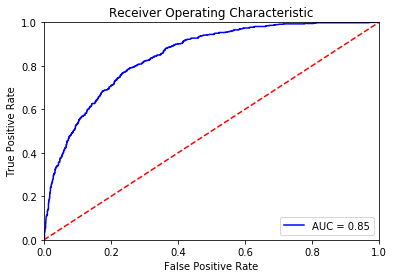

In [121]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gbm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ---- Automate pipeline ----

Write script that trains model on entire training set, saves model to disk,and scores the "test" dataset

In [130]:
%%time
gbm.fit(X_test,y_test.values.ravel())

#test_set_without_churn=test_set.drop(columns='Churn')


Roc_au_scr = roc_auc_score(y_test,predict_test)
print(roc_auc_score)

with open('model.txt', 'w') as file:
    print("Writing.......")
    file.write(str(gbm))
    file.write("\n")
    file.write("Roc Auc Score=")
    file.write(str(roc_auc_score))
    print("Successfully writtern!")

<function roc_auc_score at 0x000001E5F3AA9798>
Writing.......
Successfully writtern!
Wall time: 653 ms
